<a href="https://colab.research.google.com/github/ankitg-02/sales_analysis/blob/main/Home_Office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#importing data from excelsheet
home_office_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(home_office_sales)
data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6284,6285,CA-2016-100944,2016-09-24,2016-09-28,Standard Class,EH-13765,Edward Hooks,Corporate,United States,Los Angeles,...,90049,West,FUR-CH-10000988,Furniture,Chairs,Hon Olson Stacker Stools,563.240,5,0.2,56.3240
2239,2240,CA-2016-146633,2016-11-15,2016-11-17,Second Class,TG-21310,Toby Gnade,Consumer,United States,Los Angeles,...,90049,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1016.792,1,0.2,381.2970
1731,1732,CA-2014-125136,2014-09-28,2014-10-03,Standard Class,KD-16495,Keith Dawkins,Corporate,United States,Fayetteville,...,28314,South,OFF-PA-10001804,Office Supplies,Paper,Xerox 195,10.688,2,0.2,3.7408
5498,5499,CA-2017-164378,2017-07-15,2017-07-18,Second Class,MM-18055,Michelle Moray,Consumer,United States,New York City,...,10024,East,OFF-LA-10000634,Office Supplies,Labels,Avery 509,7.830,3,0.0,3.6018
4362,4363,CA-2017-111332,2017-05-20,2017-05-22,Second Class,NC-18340,Nat Carroll,Consumer,United States,Fargo,...,58103,Central,OFF-AR-10001953,Office Supplies,Art,Boston 1645 Deluxe Heavier-Duty Electric Penci...,131.940,3,0.0,35.6238


In [10]:
home_office=data.groupby("Segment")
home_office_mod=home_office.get_group("Home Office")
home_office_mod

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.4720,3,0.20,9.9468
37,38,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,OFF-EN-10002986,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.3280,9,0.20,35.4150
38,39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.3600,2,0.00,6.4128
9976,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.5840,2,0.20,31.1980
9977,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7,0.00,0.0000
9978,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.3760,4,0.20,4.6816


In [11]:
home_office_mod.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [12]:
home_office_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1783 entries, 14 to 9979
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1783 non-null   int64         
 1   Order ID       1783 non-null   object        
 2   Order Date     1783 non-null   datetime64[ns]
 3   Ship Date      1783 non-null   datetime64[ns]
 4   Ship Mode      1783 non-null   object        
 5   Customer ID    1783 non-null   object        
 6   Customer Name  1783 non-null   object        
 7   Segment        1783 non-null   object        
 8   Country        1783 non-null   object        
 9   City           1783 non-null   object        
 10  State          1783 non-null   object        
 11  Postal Code    1783 non-null   int64         
 12  Region         1783 non-null   object        
 13  Product ID     1783 non-null   object        
 14  Category       1783 non-null   object        
 15  Sub-Category   1783 non-n

In [15]:
for i in home_office_mod.columns:
  print(i,':','\n',home_office_mod[i].unique())


Row ID : 
 [  15   16   35 ... 9978 9979 9980]
Order ID : 
 ['US-2015-118983' 'CA-2017-107727' 'CA-2015-117415' 'US-2015-164175'
 'US-2017-119662' 'CA-2016-159695' 'US-2017-109484' 'CA-2017-161018'
 'CA-2016-158568' 'CA-2015-129476' 'US-2014-152030' 'US-2016-125969'
 'CA-2014-110072' 'CA-2016-158834' 'CA-2015-118948' 'CA-2015-137225'
 'CA-2014-158274' 'CA-2014-123260' 'CA-2015-102281' 'CA-2017-107720'
 'US-2017-100930' 'CA-2014-131926' 'CA-2016-110772' 'CA-2014-111003'
 'CA-2014-164973' 'CA-2016-129714' 'CA-2017-102946' 'CA-2015-122259'
 'CA-2014-101476' 'US-2016-123750' 'CA-2016-147375' 'CA-2016-109869'
 'US-2015-101399' 'CA-2017-140963' 'CA-2014-133753' 'CA-2017-127432'
 'CA-2017-113558' 'CA-2015-147851' 'CA-2017-162929' 'CA-2017-163020'
 'CA-2016-115917' 'US-2017-127719' 'CA-2017-126221' 'CA-2016-132661'
 'US-2016-156097' 'US-2017-106663' 'CA-2015-119291' 'CA-2014-113887'
 'CA-2014-104472' 'CA-2016-112942' 'CA-2014-117429' 'CA-2017-131954'
 'CA-2014-112326' 'CA-2015-144267' 'US-2017

In [14]:
home_office_mod.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,1783.000000,1783,1783,1783,1783,1783,1783,1783,1783,1783,...,1783.000000,1783,1783,1783,1783,1783,1783.000000,1783.000000,1783.000000,1783.000000
unique,NaN,909,NaN,NaN,4,148,148,1,1,264,...,NaN,4,1112,3,17,1106,NaN,NaN,NaN,NaN
top,NaN,US-2016-108504,NaN,NaN,Standard Class,MA-17560,Matt Abelman,Home Office,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Easy-staple paper,NaN,NaN,NaN,NaN
freq,NaN,11,NaN,NaN,1071,34,34,1783,1783,145,...,NaN,571,8,1079,270,13,NaN,NaN,NaN,NaN
mean,4968.565339,NaN,2016-06-01 10:59:49.904655104,2016-06-05 09:07:34.290521600,NaN,NaN,NaN,NaN,NaN,NaN,...,55051.998317,NaN,NaN,NaN,NaN,NaN,240.972041,3.782389,0.147128,33.818664
min,15.000000,NaN,2014-01-04 00:00:00,2014-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.990000,1.000000,0.000000,-3399.980000
25%,2583.500000,NaN,2015-08-08 00:00:00,2015-08-12 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23464.000000,NaN,NaN,NaN,NaN,NaN,17.045000,2.000000,0.000000,1.984250
50%,4823.000000,NaN,2016-08-29 00:00:00,2016-09-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,55113.000000,NaN,NaN,NaN,NaN,NaN,52.440000,3.000000,0.000000,9.102000
75%,7624.500000,NaN,2017-05-22 00:00:00,2017-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90004.000000,NaN,NaN,NaN,NaN,NaN,210.906000,5.000000,0.200000,31.559850
max,9980.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99207.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,3919.988800


**Exploritory Data Analysis**

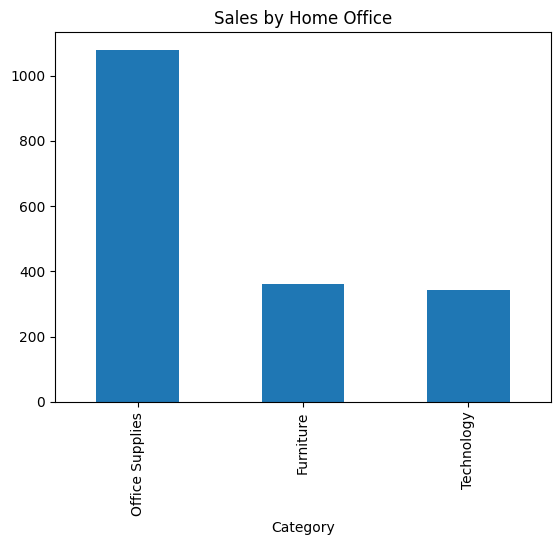

In [18]:
#category-wise sales distribution by home office
home_office_mod['Category'].value_counts().plot(kind='bar')
plt.title("Sales by Home Office")
plt.show()

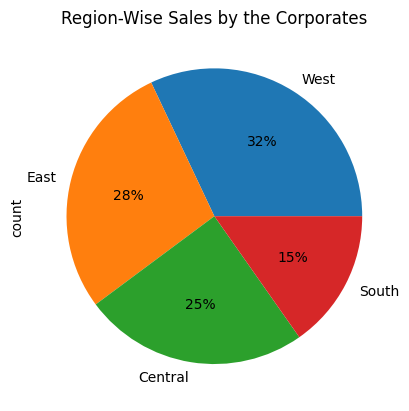

In [19]:
#distirbution of sales pattern about the region by the home office category
home_office_mod['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Corporates")
plt.show()

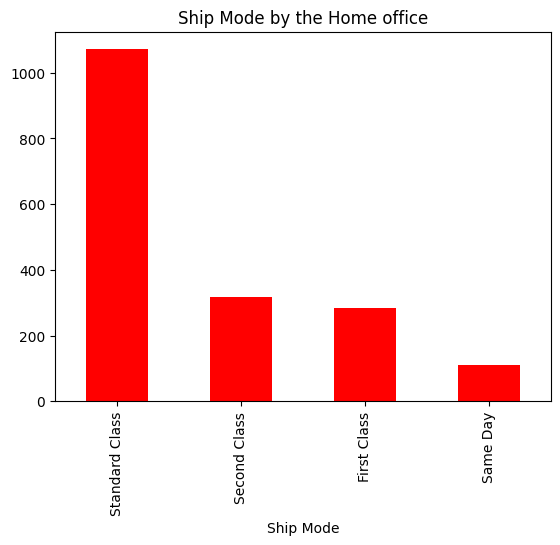

In [22]:
#Shipping mode of items ordered by home office segment
home_office_mod['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Home office")
plt.show()

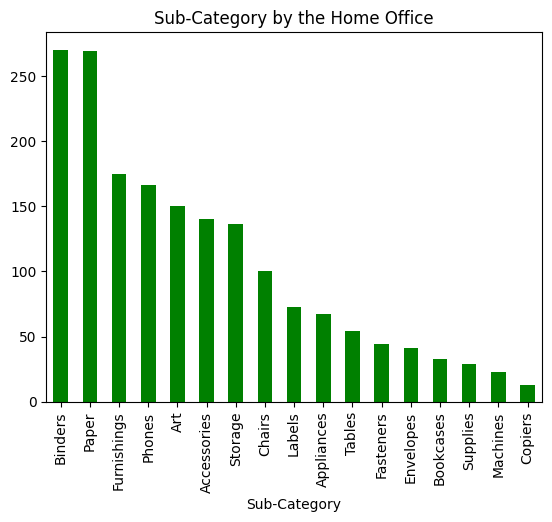

In [23]:
#sub-category items ordered by the Home office segment
home_office_mod['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Home Office")
plt.show()

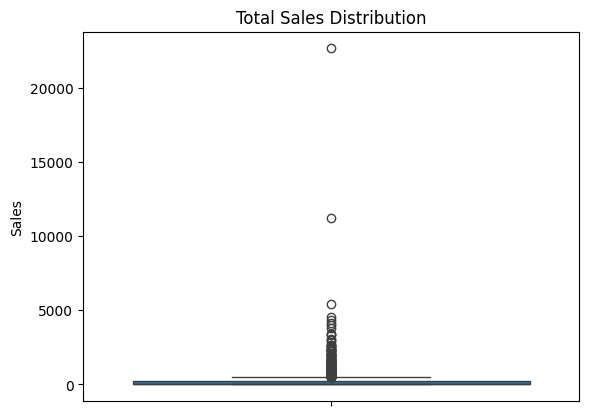

In [24]:
#sales pattern distribution
sns.boxplot(home_office_mod['Sales'])
plt.title("Total Sales Distribution")
plt.show()

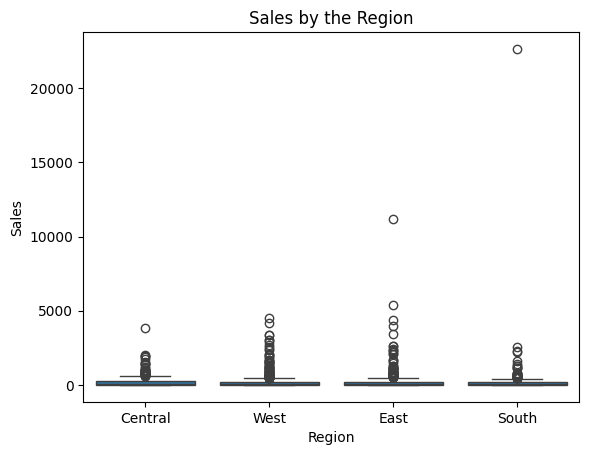

In [25]:
#sales distribution pattern region-wise
sns.boxplot(x=home_office_mod['Region'],y=home_office_mod['Sales'])
plt.title("Sales by the Region")
plt.show()

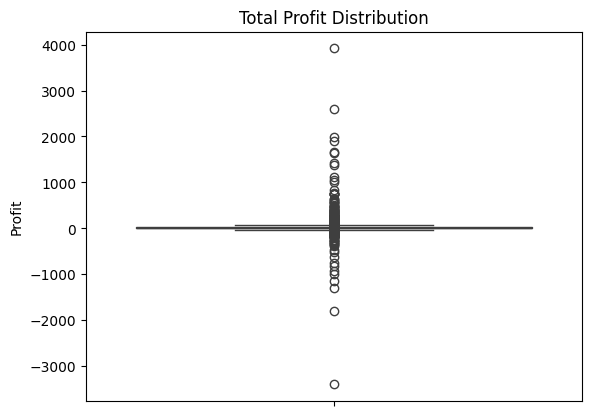

In [26]:
#profit pattern distribution
sns.boxplot(home_office_mod['Profit'])
plt.title("Total Profit Distribution")
plt.show()

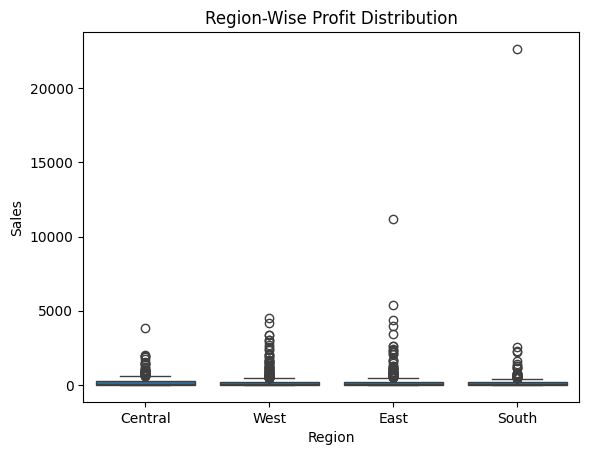

In [27]:
#profit pattern distribution
sns.boxplot(y=home_office_mod['Sales'],x=home_office_mod['Region'])
plt.title("Region-Wise Profit Distribution")
plt.show()

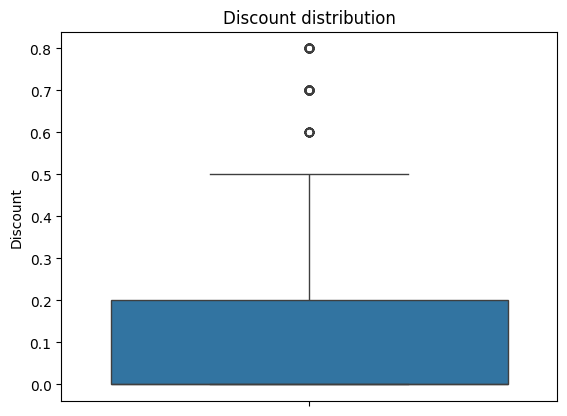

In [28]:
#discount pattern distribution
sns.boxplot(home_office_mod['Discount'])
plt.title("Discount distribution")
plt.show()

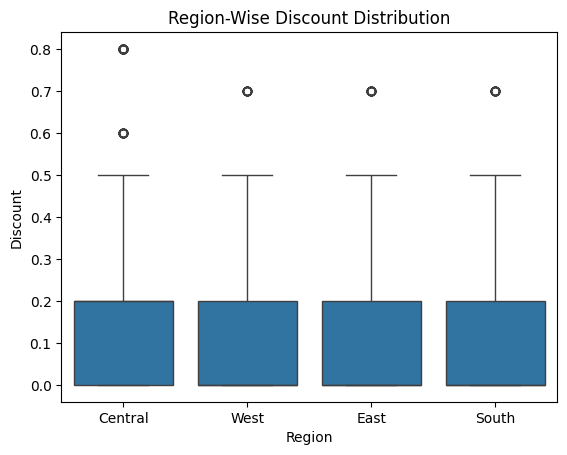

In [29]:
#discount pattern distribution
sns.boxplot(y=home_office_mod['Discount'],x=home_office_mod['Region'])
plt.title("Region-Wise Discount Distribution")
plt.show()

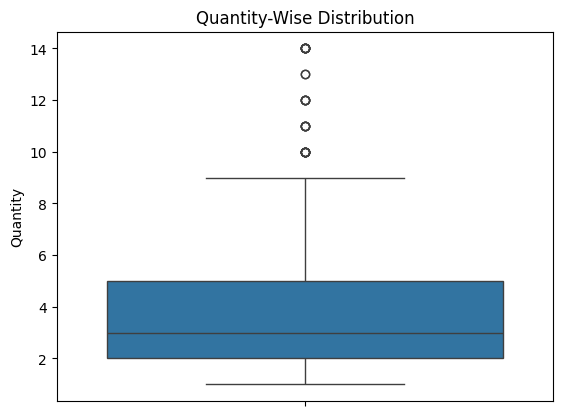

In [30]:
#quantity pattern distribution
sns.boxplot(home_office_mod['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

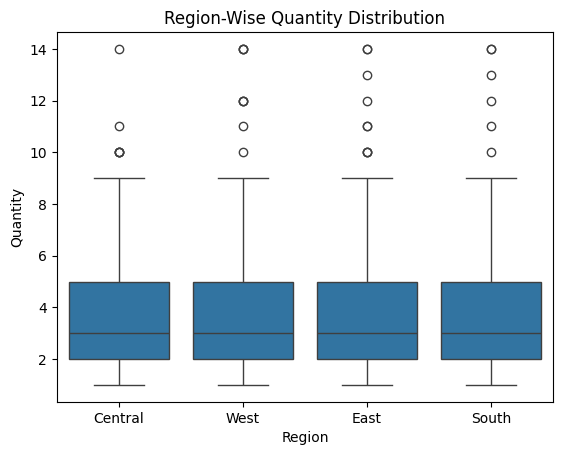

In [31]:
#quantity pattern distribution
sns.boxplot(y=home_office_mod['Quantity'],x=home_office_mod['Region'])
plt.title("Region-Wise Quantity Distribution")
plt.show()